In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports
library(readr)
library(dplyr)
library(ggplot2)
library(tidycensus)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [40]:
import pandas as pd

In [59]:
texas_hiv = pd.read_csv("texas_hiv.csv")

In [60]:
%%R
texas_hiv <- read_csv("texas_hiv.csv")

Rows: 255 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): County
num (2): # HIV Cases, County Value**

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [43]:
%%R

install.packages(c("tidycensus", "tidyverse"))


The downloaded binary packages are in
	/var/folders/vt/pkjvr6656lv0kkp6hgt8rwvr0000gn/T//RtmpqBWRG7/downloaded_packages


trying URL 'https://cran.csie.ntu.edu.tw/bin/macosx/big-sur-arm64/contrib/4.4/tidycensus_1.7.1.tgz'
Content type 'application/octet-stream' length 3554938 bytes (3.4 MB)
downloaded 3.4 MB

trying URL 'https://cran.csie.ntu.edu.tw/bin/macosx/big-sur-arm64/contrib/4.4/tidyverse_2.0.0.tgz'
Content type 'application/octet-stream' length 428901 bytes (418 KB)
downloaded 418 KB



In [44]:
%%R
census_api_key("----")

To install your API key for use in future sessions, run this function with `install = TRUE`.


In [45]:
%%R
tx_socioeconomic <- get_acs(
  geography = "county",
  variables = c(
    # Original variables
    labor_force = "B23025_002",       # Civilian labor force 16 years and over
    unemployed = "B23025_005",        # Unemployed
    total_pop_ins = "B27001_001",     # Total population for health insurance coverage
    uninsured = "B27010_033",         # No health insurance coverage
    total_25_plus = "B15003_001",     # Total population 25 years and over
    less_than_9th = "B15003_003",     # Less than 9th grade
    some_hs = "B15003_004",           # 9th to 12th grade, no diploma
    hs_graduate = "B15003_017",       # High school graduate
    some_college = "B15003_018",      # Some college, no degree
    associates = "B15003_021",        # Associate's degree
    bachelors = "B15003_022",         # Bachelor's degree
    masters = "B15003_023",           # Master's degree
    professional = "B15003_024",      # Professional degree
    doctorate = "B15003_025",         # Doctorate degree
    total_poverty = "B17001_001",     # Total population for poverty status
    below_poverty = "B17001_002",     # Income below poverty level
    
    # Population for density calculation
    total_population = "B01003_001",  # Total population
    land_area = "B01001_001",         # Land area in square miles
    
    # Race variables
    white_alone = "B02001_002",       # White alone
    black_alone = "B02001_003",       # Black or African American alone
    native_american = "B02001_004",   # American Indian and Alaska Native alone
    asian_alone = "B02001_005",       # Asian alone
    pacific_islander = "B02001_006",  # Native Hawaiian and Other Pacific Islander alone
    other_race = "B02001_007",        # Some other race alone
    two_or_more = "B02001_008",       # Two or more races
    hispanic = "B03003_003"           # Hispanic or Latino
  ),
  state = "TX",
  year = 2019
)

Getting data from the 2015-2019 5-year ACS
Using FIPS code '48' for state 'TX'
Using FIPS code '48' for state 'TX'


In [46]:
%%R
tx_socioeconomic <- tx_socioeconomic %>%
  spread(variable, estimate) %>%
  mutate(population_density = total_population / land_area)

In [47]:
%%R
library(tigris)
tx_counties <- counties(state = "TX", year = 2019)
tx_counties$land_area_sqmi <- tx_counties$ALAND / 2589988.11  # Convert sq meters to sq miles


Using FIPS code '48' for state 'TX'


In [48]:
%%R
tx_counties <- counties(state = "TX", year = 2019)
tx_counties <- tx_counties %>%
  mutate(land_area_sqmi = ALAND / 2589988.11,  # Convert sq meters to sq miles
         GEOID = as.character(GEOID))  # Make sure GEOID is character for joining

Using FIPS code '48' for state 'TX'


In [49]:
%%R
library(sf)

In [50]:
%%R
land_area_df <- tx_counties %>%
  st_drop_geometry() %>%  # Drop geometry to make it a regular dataframe
  select(GEOID, land_area_sqmi)

In [51]:
%%R
tx_socioeconomic %>%
  filter(NAME == "Anderson County, Texas") %>%
  select(GEOID, NAME, total_population, land_area)

# A tibble: 23 × 4
   GEOID NAME                   total_population land_area
   <chr> <chr>                             <dbl>     <dbl>
 1 48001 Anderson County, Texas               NA        NA
 2 48001 Anderson County, Texas               NA        NA
 3 48001 Anderson County, Texas               NA        NA
 4 48001 Anderson County, Texas               NA        NA
 5 48001 Anderson County, Texas               NA        NA
 6 48001 Anderson County, Texas               NA        NA
 7 48001 Anderson County, Texas               NA        NA
 8 48001 Anderson County, Texas               NA        NA
 9 48001 Anderson County, Texas               NA        NA
10 48001 Anderson County, Texas               NA        NA
# ℹ 13 more rows
# ℹ Use `print(n = ...)` to see more rows


In [52]:
%%R
tx_county_aggregated <- tx_socioeconomic %>%
  group_by(GEOID, NAME) %>%
  summarise(across(everything(), ~ first(na.omit(.)), .names = "{.col}")) %>%
  ungroup()

`summarise()` has grouped output by 'GEOID'. You can override using the
`.groups` argument.


In [53]:
%%R
nrow(tx_county_aggregated)

[1] 254


In [54]:
%%R
library(tigris)
tx_counties <- counties(state = "TX", year = 2019, cb = TRUE)
land_area_df <- data.frame(
  GEOID = tx_counties$GEOID,
  land_area_sqmi = as.numeric(tx_counties$ALAND) / 2589988.11
)

Using FIPS code '48' for state 'TX'


In [55]:
%%R
tx_final <- tx_county_aggregated %>%
  left_join(land_area_df, by = "GEOID") %>%
  mutate(population_density = total_population / land_area_sqmi)


In [56]:
%%R
tx_final %>%
  select(NAME, total_population, land_area_sqmi, population_density) %>%
  head()

# A tibble: 6 × 4
  NAME                    total_population land_area_sqmi population_density
  <chr>                              <dbl>          <dbl>              <dbl>
1 Anderson County, Texas             57810          1063.              54.4 
2 Andrews County, Texas              18036          1501.              12.0 
3 Angelina County, Texas             87322           798.             109.  
4 Aransas County, Texas              24462           252.              97.0 
5 Archer County, Texas                8716           903.               9.65
6 Armstrong County, Texas             1973           909.               2.17


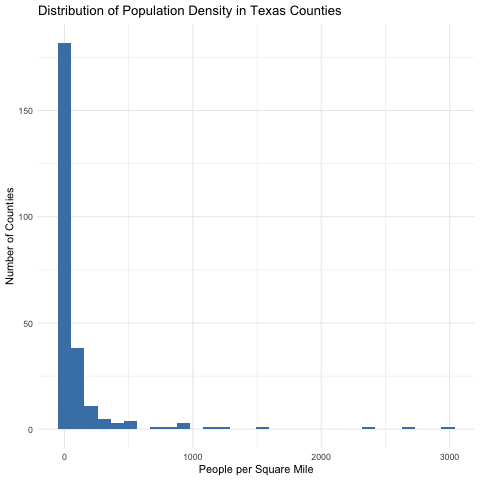

In [57]:
%%R
library(ggplot2)
ggplot(tx_final, aes(x = population_density)) +
  geom_histogram(fill = "steelblue", bins = 30) +
  labs(title = "Distribution of Population Density in Texas Counties",
       x = "People per Square Mile",
       y = "Number of Counties") +
  theme_minimal()

In [62]:
%%R
head(texas_hiv)

# A tibble: 6 × 3
  County   `# HIV Cases` `County Value**`
  <chr>            <dbl>            <dbl>
1 Texas           100700              415
2 Anderson           297              586
3 Andrews             16              112
4 Angelina           185              260
5 Aransas             36              169
6 Archer              NA               NA


In [63]:
%%R
texas_hiv_clean <- texas_hiv %>%
  filter(County != "Texas") %>%
  mutate(NAME = paste0(County, " County, Texas"))


In [64]:
%%R
tx_combined <- tx_final %>%
  left_join(texas_hiv_clean, by = "NAME")


In [66]:
%%R
glimpse(tx_combined)

Rows: 254
Columns: 34
$ GEOID              <chr> "48001", "48003", "48005", "48007", "48009", "48011…
$ NAME               <chr> "Anderson County, Texas", "Andrews County, Texas", …
$ moe                <dbl> 16, 21, 9, 25, 19, 3, 22, 25, 7, 25, 32, 14, 7, 32,…
$ asian_alone        <dbl> 321, 65, 975, 489, 15, 0, 173, 111, 57, 62, 739, 0,…
$ associates         <dbl> 2980, 623, 4449, 1337, 461, 155, 1470, 1511, 264, 1…
$ bachelors          <dbl> 2870, 814, 6413, 2423, 995, 226, 3193, 3408, 563, 2…
$ below_poverty      <dbl> 6598, 1647, 15026, 5127, 1033, 174, 7196, 3583, 590…
$ black_alone        <dbl> 12124, 122, 12890, 354, 83, 5, 135, 2684, 46, 154, …
$ doctorate          <dbl> 226, 30, 242, 176, 47, 2, 98, 140, 130, 123, 564, 1…
$ hispanic           <dbl> 10283, 10151, 19326, 6721, 722, 149, 31855, 7989, 4…
$ hs_graduate        <dbl> 11407, 3020, 14330, 4130, 1900, 270, 10438, 5184, 1…
$ labor_force        <dbl> 19868, 8484, 39169, 10606, 4577, 901, 21918, 14325,…
$ land_area       

In [67]:
%%R
tx_combined_clean <- tx_combined %>%
  rename(
    hiv_cases = `# HIV Cases`,
    hiv_rate = `County Value**`
  )


In [68]:
%%R
sum(!is.na(tx_combined_clean$hiv_cases))

[1] 214


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 40 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`). 



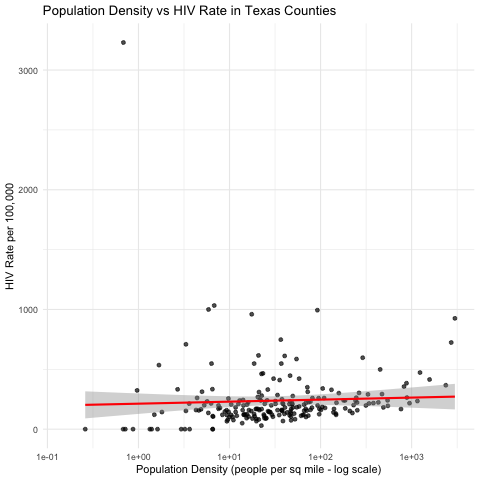

In [69]:
%%R
library(ggplot2)
ggplot(tx_combined_clean, aes(x = population_density, y = hiv_rate)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", color = "red") +
  scale_x_log10() +  # Log scale for density due to wide range
  labs(title = "Population Density vs HIV Rate in Texas Counties",
       x = "Population Density (people per sq mile - log scale)",
       y = "HIV Rate per 100,000") +
  theme_minimal()


In [70]:
%%R
tx_combined_clean %>%
  arrange(desc(hiv_rate)) %>%
  select(NAME, population_density, hiv_cases, hiv_rate) %>%
  head(10)


# A tibble: 10 × 4
   NAME                  population_density hiv_cases hiv_rate
   <chr>                              <dbl>     <dbl>    <dbl>
 1 Borden County, Texas               0.683        17     3230
 2 Garza County, Texas                6.79         54     1033
 3 Reeves County, Texas               5.88        121     1000
 4 Walker County, Texas              92.2         694      994
 5 Frio County, Texas                17.5         148      960
 6 Dallas County, Texas            2988.        19597      926
 7 Willacy County, Texas             36.6         127      748
 8 Harris County, Texas            2723.        27828      724
 9 Concho County, Texas               3.32         21      709
10 Karnes County, Texas              20.8          77      616


In [71]:
%%R
correlations <- tx_combined_clean %>%
  select(hiv_rate, population_density, below_poverty, uninsured, 
         hispanic, black_alone, white_alone) %>%
  cor(use = "pairwise.complete.obs")

print(correlations)


                    hiv_rate population_density below_poverty uninsured
hiv_rate           1.0000000          0.2032951     0.2027507 0.2062606
population_density 0.2032951          1.0000000     0.8802840 0.8912243
below_poverty      0.2027507          0.8802840     1.0000000 0.9947675
uninsured          0.2062606          0.8912243     0.9947675 1.0000000
hispanic           0.1918489          0.8523826     0.9859582 0.9722012
black_alone        0.2200478          0.8763241     0.9145228 0.9457626
white_alone        0.1919122          0.9354701     0.9726599 0.9723294
                    hispanic black_alone white_alone
hiv_rate           0.1918489   0.2200478   0.1919122
population_density 0.8523826   0.8763241   0.9354701
below_poverty      0.9859582   0.9145228   0.9726599
uninsured          0.9722012   0.9457626   0.9723294
hispanic           1.0000000   0.8571478   0.9621128
black_alone        0.8571478   1.0000000   0.9048170
white_alone        0.9621128   0.9048170   1.0000000


In [76]:
%%R
tx_combined_props <- tx_combined_clean %>%
  mutate(
    white_prop = white_alone / total_population,
    black_prop = black_alone / total_population,
    hispanic_prop = hispanic / total_population,
    poverty_rate = below_poverty / total_poverty,
    uninsured_rate = uninsured / total_pop_ins
  )

In [73]:
%%R
correlation_props <- tx_combined_props %>%
  select(hiv_rate, population_density, poverty_rate, uninsured_rate,
         hispanic_prop, black_prop, white_prop) %>%
  cor(use = "pairwise.complete.obs")

print(correlation_props)

                      hiv_rate population_density poverty_rate uninsured_rate
hiv_rate            1.00000000        0.203295068  -0.01022771    -0.02849568
population_density  0.20329507        1.000000000  -0.08872690     0.02950032
poverty_rate       -0.01022771       -0.088726899   1.00000000     0.44951525
uninsured_rate     -0.02849568        0.029500323   0.44951525     1.00000000
hispanic_prop       0.03070959        0.005735388   0.41293325     0.58598787
black_prop          0.19114490        0.284788446   0.08009761    -0.09331727
white_prop         -0.15584565       -0.298770821   0.02633682     0.04859255
                   hispanic_prop  black_prop  white_prop
hiv_rate             0.030709591  0.19114490 -0.15584565
population_density   0.005735388  0.28478845 -0.29877082
poverty_rate         0.412933248  0.08009761  0.02633682
uninsured_rate       0.585987868 -0.09331727  0.04859255
hispanic_prop        1.000000000 -0.39668297  0.05609243
black_prop          -0.396682971  

In [74]:
%%R
write_csv(tx_combined_clean, "texas_socioeconomic_hiv_combined.csv")

In [75]:
%%R
file.exists("texas_socioeconomic_hiv_combined.csv")

[1] TRUE
